# Heart Disease Dataset

Heart disease is broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred as cardiovascular diseases. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack


`About Dataset`

**Context:**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## 1.1 **Data Dictionary** <a class="anchor" id="1.1"></a>

1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = `error (in the original dataset 0 maps to NaN's)`
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease
---    

## Importing the required libraries


In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebbok
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

## Reading the csv file


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Exploration (exploratory data analysis or EDA)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

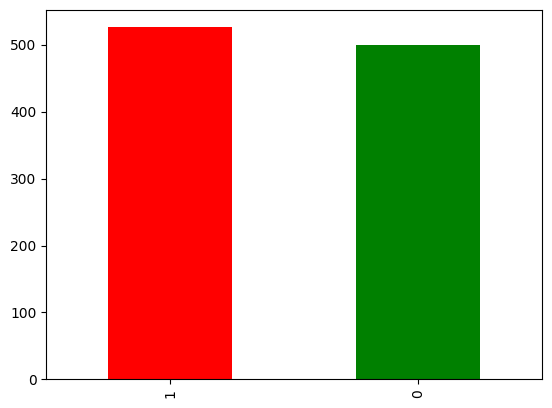

In [7]:
df['target'].value_counts().plot(kind='bar', color = ['red', 'green'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex


In [11]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

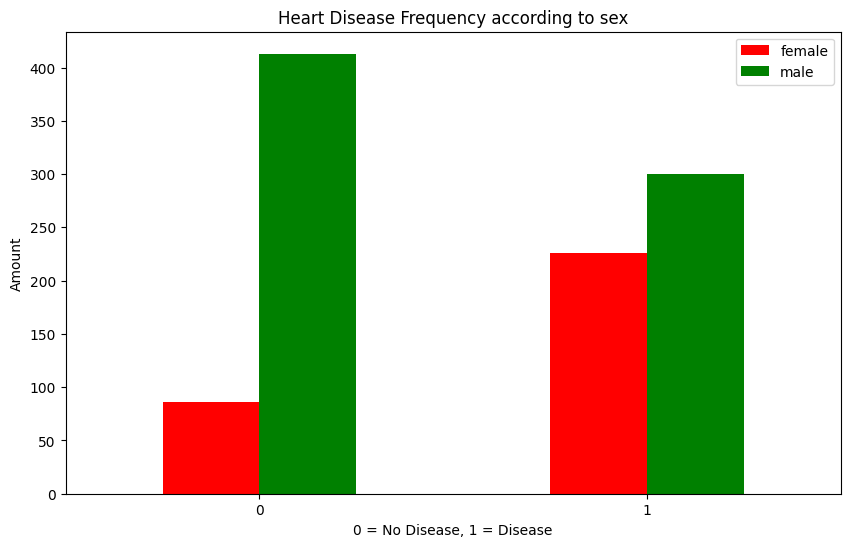

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['red', 'green'] )
plt.title('Heart Disease Frequency according to sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['female','male'],)
plt.xticks(rotation=0)

### AGE vs Max Heart Rate for Heart Disease


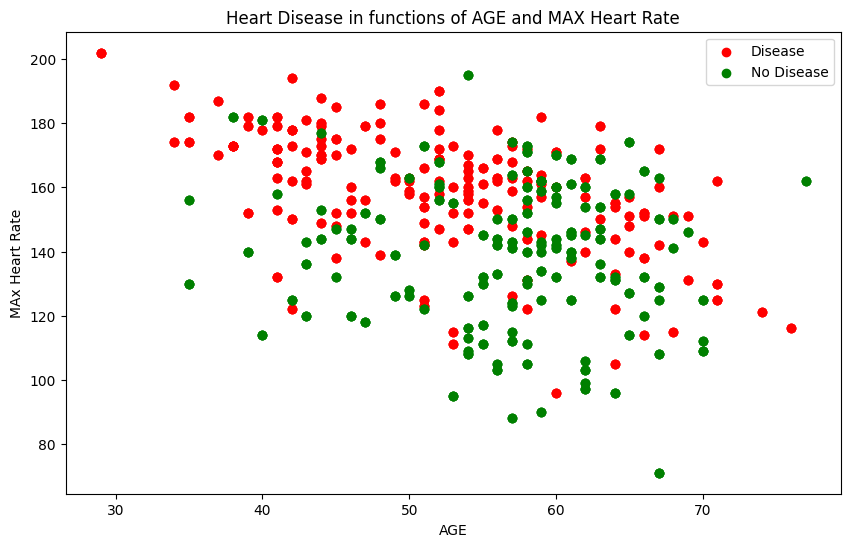

In [14]:
# Create Another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="green")

plt.title("Heart Disease in functions of AGE and MAX Heart Rate")
plt.xlabel("AGE")
plt.ylabel("MAx Heart Rate")
plt.legend(['Disease', 'No Disease'])

<Axes: ylabel='Frequency'>

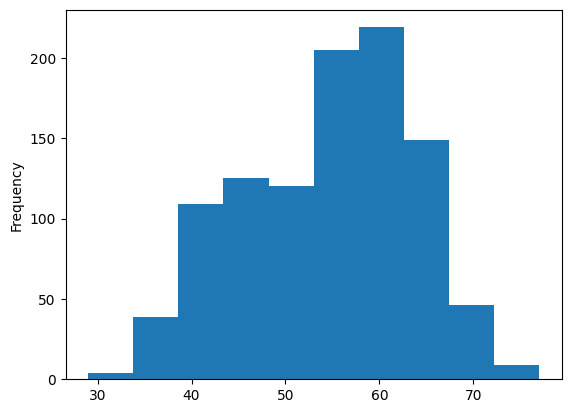

In [15]:
# Check the Distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease Frequency per chest pain type

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

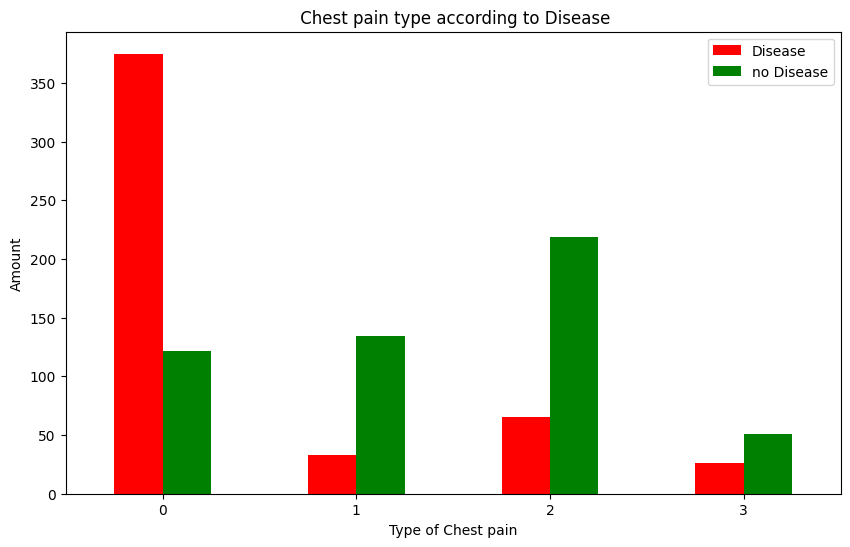

In [17]:
# Create a plot of crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['red', 'green'] )
plt.title(' Chest pain type according to Disease')
plt.xlabel("Type of Chest pain")
plt.ylabel("Amount")
plt.legend(['Disease','no Disease'],)
plt.xticks(rotation=0)

### Make correlation matrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


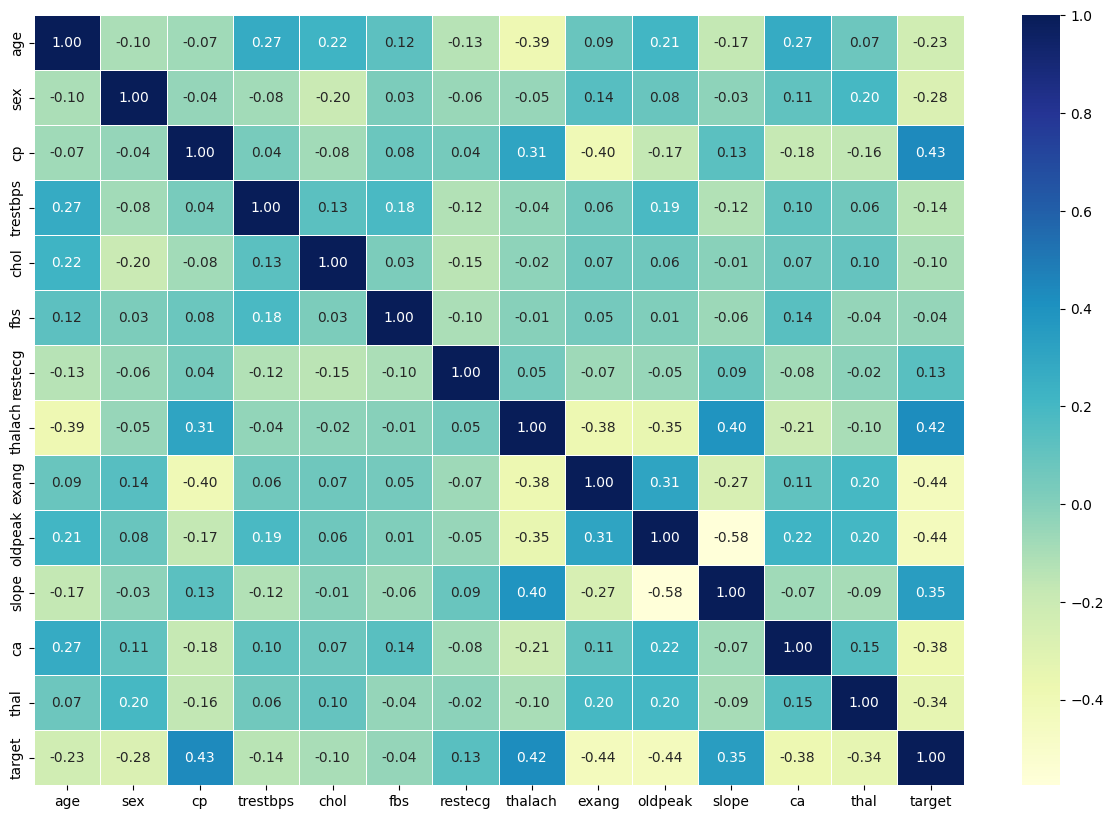

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Split Data into X and y

X = df.drop('target', axis=1)
y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
np.random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [26]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

**We're going to try 3 different machine learning models:**

`1. Logistic Regression`

`2. K-Nearest Neighbours Classifier`

`3. Random Forest`

In [27]:
# Put models in a Dictionary
models = {
        'Logistic Regression' : LogisticRegression(),
        'KNN' : KNeighborsClassifier(),
        'Random Forest' : RandomForestClassifier()}

# Create a functions to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # set random seed
    np.random.seed(42)
    # Make dictonary to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluat the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models, X_train=X_train,
                            X_test=X_test, y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model Comparison

<Axes: >

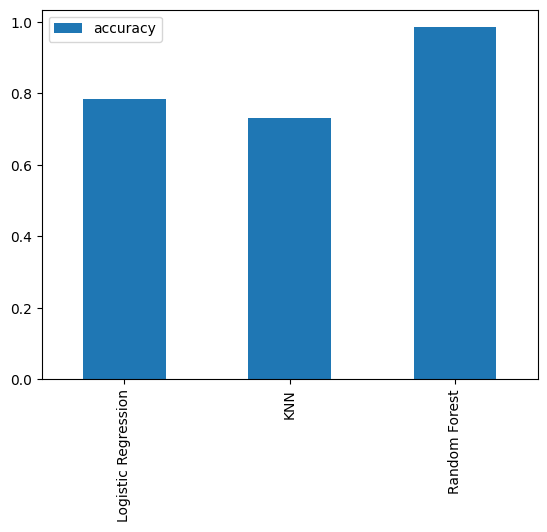

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tunning

In [30]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through differnet n_neighors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train, y_train)
    # update training scores list
    train_score.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))

Max knn score on test data: 98.54%


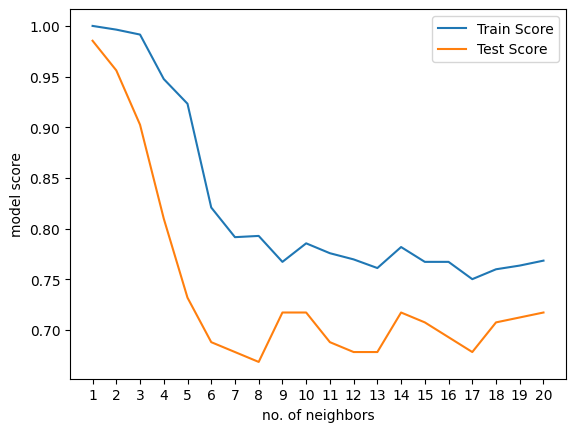

In [31]:
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("no. of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"Max knn score on test data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

`LogisticRegression`

`RandomForestClassifier`

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


In [33]:
# Tune LogisticRegression

np.random.seed(42)

# random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [35]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [36]:
# Tune RandomForestClassifier

# Random seed
np.random.seed(43)


# random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [38]:
rs_rf.score(X_test, y_test)

0.926829268292683

In [39]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Hyperparameter tuning  with GridSearchCV

**LogisticRegression model give the best score so far.
Now we'll try and improve them again using GridSearchCV**

In [40]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

### Evaluting our tuned machine learning classifier, beyond the accuracy

* ROC curve and Auc score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [43]:
# Make Predictions With tunned model
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [45]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [47]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[71 31]
 [13 90]]


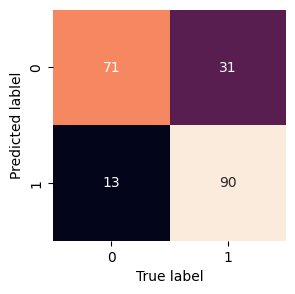

In [48]:
def plot_conf_mat(y_test, y_preds):
    """
    plots a confusion matrix using Seaborn's Heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted lablel")

plot_conf_mat(y_test, y_preds)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



**Calculate evaluation metrics using cross-validation (using cross_vval_score)**

In [50]:
# Best hyperparameter
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [52]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.87804878, 0.84878049, 0.88292683, 0.8195122 , 0.8       ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8458536585365855

In [54]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8140908250785517

In [55]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9069362084456424

In [56]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8579960964556059

<Axes: title={'center': 'Cross-validated classification metrics'}>

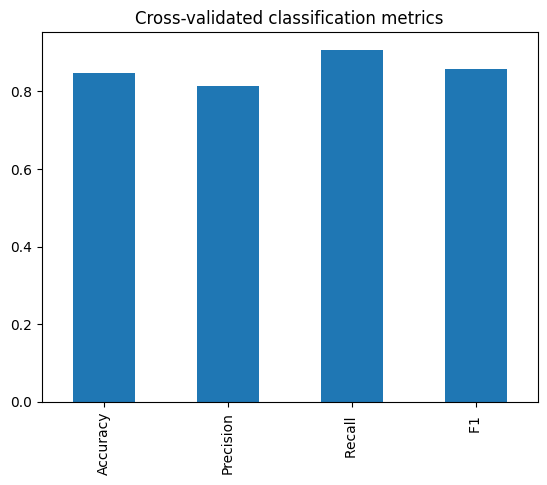

In [57]:
# Visualize cross-validated metric
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Precision" : cv_precision,
                         "Recall ": cv_recall,
                         "F1 ": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

### Features Important

In [58]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [59]:
# Check coef
clf.coef_

array([[ 0.01575073, -1.26513718,  0.77534798, -0.0137216 , -0.00699639,
        -0.14437778,  0.28403604,  0.03492711, -0.64220231, -0.62257009,
         0.4642865 , -0.753265  , -0.91923684]])

In [60]:
# Match coef's of features to colums
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.015750725880424546,
 'sex': -1.2651371768029855,
 'cp': 0.7753479825252352,
 'trestbps': -0.013721596742852268,
 'chol': -0.006996392260266003,
 'fbs': -0.14437777516469838,
 'restecg': 0.28403603531191973,
 'thalach': 0.03492710863258235,
 'exang': -0.6422023086596139,
 'oldpeak': -0.6225700936629288,
 'slope': 0.4642865008299764,
 'ca': -0.7532649974619972,
 'thal': -0.9192368406541005}

<Axes: title={'center': 'Feature Important'}>

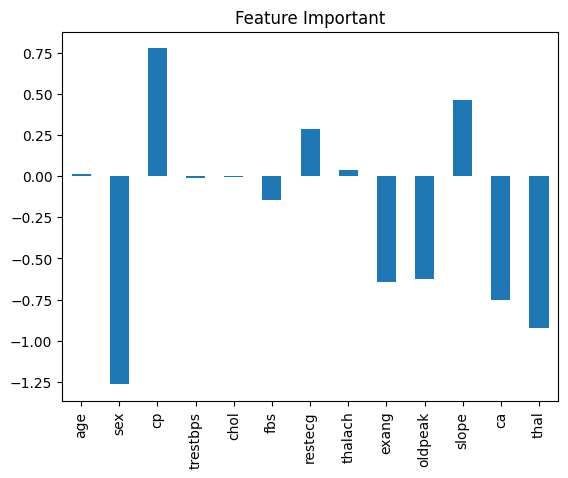

In [61]:
# Visualize features important
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Important", legend=False)

# **Conclusion**

1. LogisticRegression gives the best Accuracy compared to other models.

2. Exercise induced angina,Chest pain is major symptoms of heart attack.

3. Ensembling technique increase the accuracy of the model.